In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics 
from scipy.stats import norm 
from scipy.stats import chi2
from scipy.stats import cauchy

# Esercitazione 4

## Stato solido 

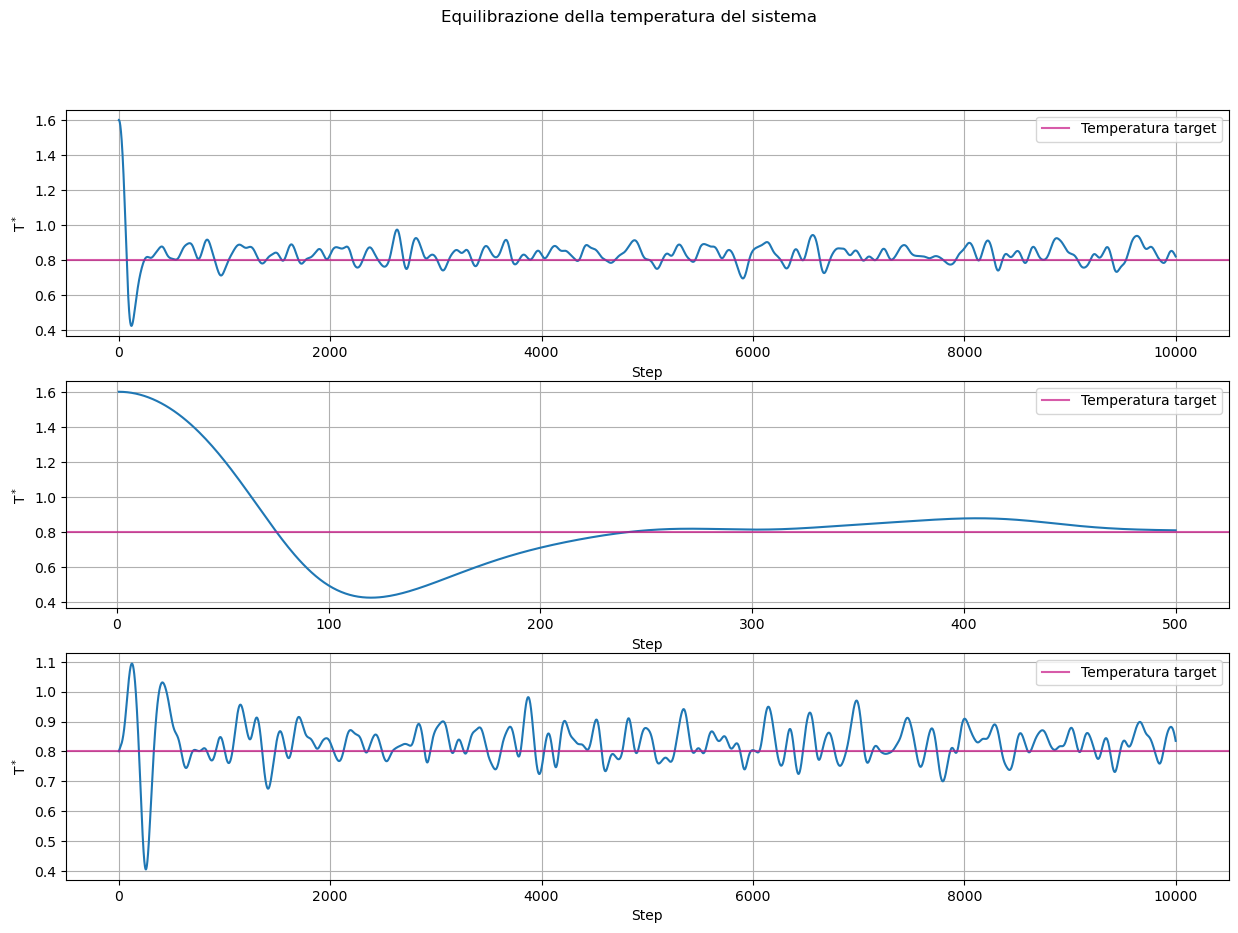

In [36]:
Ntot=10000  #passi totali della simulazione
xeqtot=np.arange(Ntot)+1  #T di equilibrazione la plotto in base agli steps, non faccio media a blocchi, faccio +1 perchè indicizza da 0 np.arange
solTeqtot=np.loadtxt("SolidState/eqtemptot.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

Npar=500  #passi della simulazione parziale
xeqpar=np.arange(Npar)+1  #T di equilibrazione la plotto in base agli steps, non faccio media a blocchi, faccio +1 perchè indicizza da 0 np.arange
solTeqpar=np.loadtxt("SolidState/eqtemppar.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

solTeqfin=np.loadtxt("SolidState/eqtempfin.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

sfig ,(splt1, splt2, splt3) = plt.subplots(3, 1, figsize=(15, 10))

splt1.plot(xeqtot, solTeqtot)
splt1.axhline(y=0.8, color="mediumvioletred", label="Temperatura target", alpha=0.7)
splt1.set_xlabel("Step")
splt1.set_ylabel(r"$\mathrm{T^*}$")
splt1.grid(True)
splt1.legend()

splt2.plot(xeqpar, solTeqpar)
splt2.axhline(y=0.8, color="mediumvioletred", label="Temperatura target", alpha=0.7)
splt2.set_xlabel("Step")
splt2.set_ylabel(r"$\mathrm{T^*}$")
splt2.grid(True)
splt2.legend()

splt3.plot(xeqtot, solTeqfin)
splt3.axhline(y=0.8, color="mediumvioletred", label="Temperatura target", alpha=0.7)
splt3.set_xlabel("Step")
splt3.set_ylabel(r"$\mathrm{T^*}$")
splt3.grid(True)
splt3.legend()

sfig.suptitle("Equilibrazione della temperatura del sistema")
plt.show()

Faccio misura di temperatura del sistema a ogni step, vedo che poco dopo l'inizio ho equilibrazione, allora rifaccio andare la simulazione solo sul primo pezzettino (quello che considero il tempo di equilibrazione) e do le configurazioni finali di questo pezzo come configurazioni iniziali delle prossime simulazioni. In questo modo le simulazioni seguenti vengono già svolte sul sistema in equilibrio, la temperatura oscilla ancora ma effettivamente facendola partire dalla temperatura target la media resta quella. CONTROLLA CHE SIA GIUSTO!!!

## Stato liquido

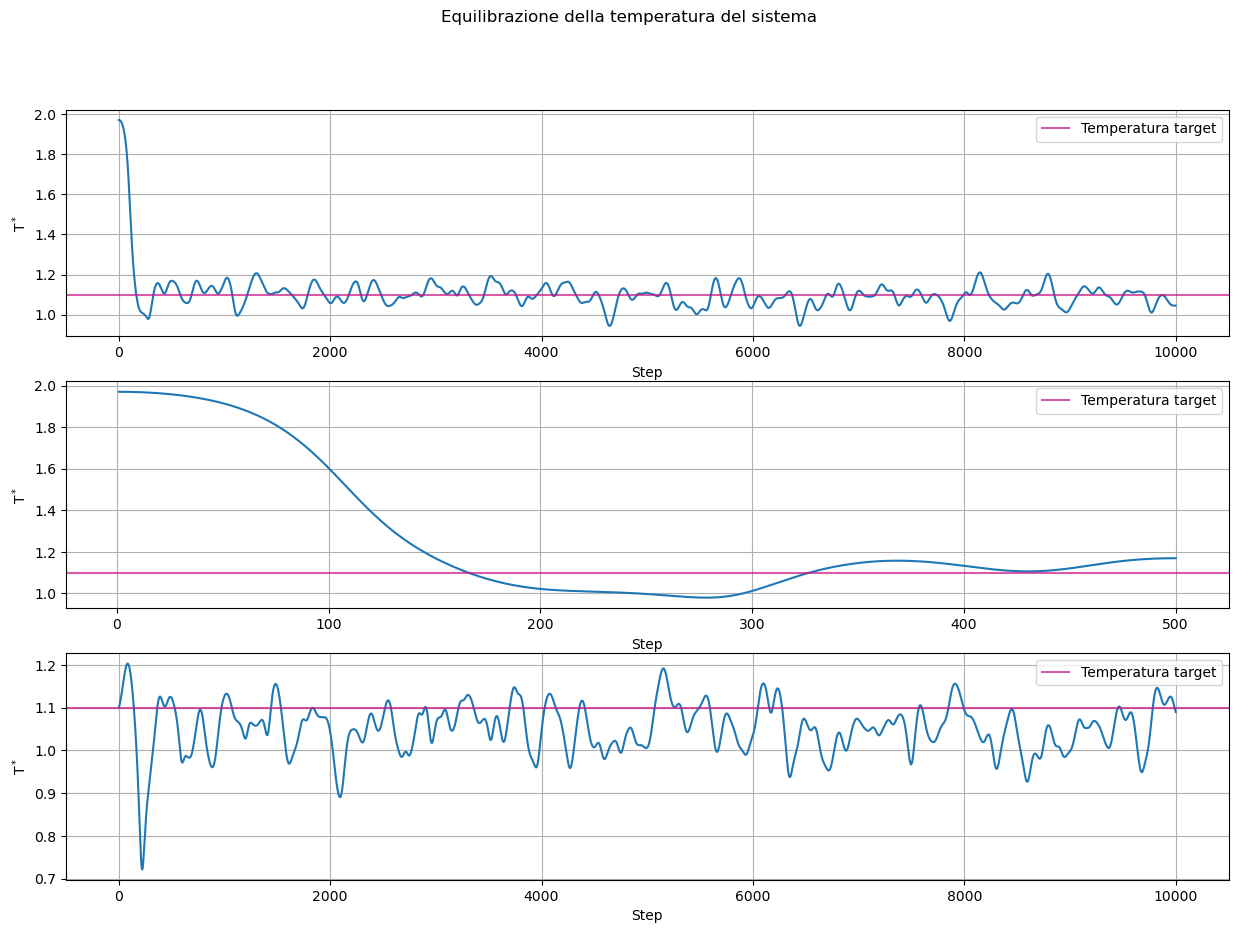

In [37]:
liqTeqtot=np.loadtxt("LiquidState/eqtemptot.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
liqTeqpar=np.loadtxt("LiquidState/eqtemppar.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
liqTeqfin=np.loadtxt("LiquidState/eqtempfin.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

lfig ,(lplt1, lplt2, lplt3) = plt.subplots(3, 1, figsize=(15, 10))

lplt1.plot(xeqtot, liqTeqtot)
lplt1.axhline(y=1.1, color="mediumvioletred", label="Temperatura target", alpha=0.7)
lplt1.set_xlabel("Step")
lplt1.set_ylabel(r"$\mathrm{T^*}$")
lplt1.grid(True)
lplt1.legend()

lplt2.plot(xeqpar, liqTeqpar)
lplt2.axhline(y=1.1, color="mediumvioletred", label="Temperatura target", alpha=0.7)
lplt2.set_xlabel("Step")
lplt2.set_ylabel(r"$\mathrm{T^*}$")
lplt2.grid(True)
lplt2.legend()

lplt3.plot(xeqtot, liqTeqfin)
lplt3.axhline(y=1.1, color="mediumvioletred", label="Temperatura target", alpha=0.7)
lplt3.set_xlabel("Step")
lplt3.set_ylabel(r"$\mathrm{T^*}$")
lplt3.grid(True)
lplt3.legend()

lfig.suptitle("Equilibrazione della temperatura del sistema")
plt.show()

## Stato gassoso

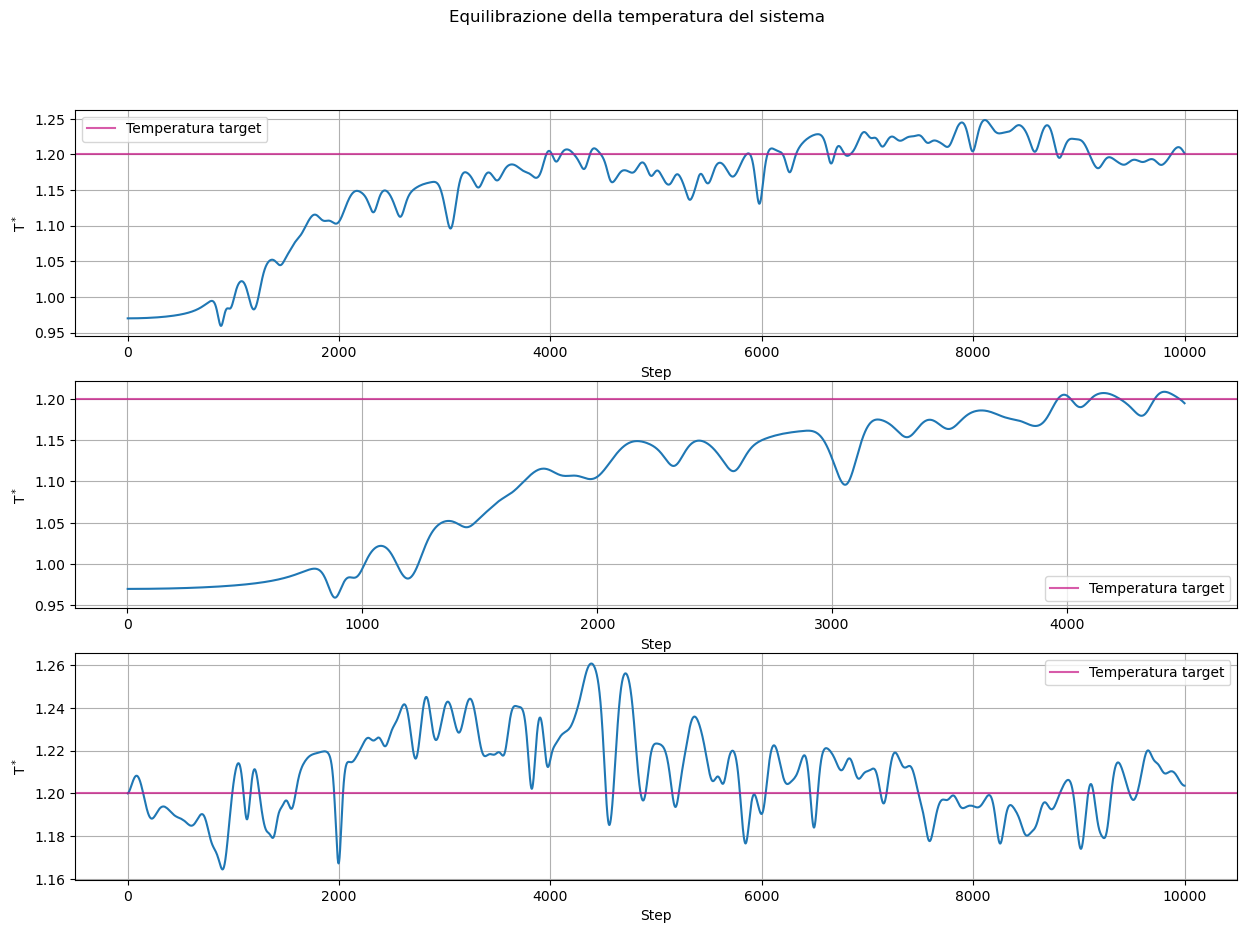

In [42]:
Gpar=4500
xeqg=np.arange(Gpar)+1

gasTeqtot=np.loadtxt("GasState/eqtemptot.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
gasTeqpar=np.loadtxt("GasState/eqtemppar.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
gasTeqfin=np.loadtxt("GasState/eqtempfin.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

gfig ,(gplt1, gplt2, gplt3) = plt.subplots(3, 1, figsize=(15, 10))

gplt1.plot(xeqtot, gasTeqtot)
gplt1.axhline(y=1.2, color="mediumvioletred", label="Temperatura target", alpha=0.7)
gplt1.set_xlabel("Step")
gplt1.set_ylabel(r"$\mathrm{T^*}$")
gplt1.grid(True)
gplt1.legend()

gplt2.plot(xeqg, gasTeqpar)
gplt2.axhline(y=1.2, color="mediumvioletred", label="Temperatura target", alpha=0.7)
gplt2.set_xlabel("Step")
gplt2.set_ylabel(r"$\mathrm{T^*}$")
gplt2.grid(True)
gplt2.legend()

gplt3.plot(xeqtot, gasTeqfin)
gplt3.axhline(y=1.2, color="mediumvioletred", label="Temperatura target", alpha=0.7)
gplt3.set_xlabel("Step")
gplt3.set_ylabel(r"$\mathrm{T^*}$")
gplt3.grid(True)
gplt3.legend()

gfig.suptitle("Equilibrazione della temperatura del sistema")
plt.show()